# Stuck Pipe Events Prediction - Analisis Exploratorio de Datos

# 1. Carga De Librerias Y Datos

In [161]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time

import warnings
warnings.filterwarnings("ignore")

from pycaret.datasets import get_data
from pycaret.classification import *

%matplotlib widget

In [92]:
# Funciones necesarias para el procesamiento de la informacion

def unir_data(df_old,df_new):
    '''
    Esta funcion une el datframe de los datos previos con el dataframe de los datos nuevos
    '''
    
    df= pd.concat([df_old, df_new], axis=0)
    return df

In [93]:
# Lectura de archivos por evento
Evento1 = pd.read_csv("Evento 1.csv")
Evento2 = pd.read_csv("Evento 2.csv")
Evento3 = pd.read_csv("Evento 3.csv")
Evento4 = pd.read_csv("Evento 4.csv")
Evento5 = pd.read_csv("Evento 5.csv")
Evento6 = pd.read_csv("Evento 6.csv")
Evento8 = pd.read_csv("Evento 8.csv")
Evento9 = pd.read_csv("Evento 9.csv")
Evento10 = pd.read_csv("Evento 10.csv")
Evento11 = pd.read_csv("Evento 11.csv")
Evento12 = pd.read_csv("Evento 12.csv")
Evento13 = pd.read_csv("Evento 13.csv")
Evento14 = pd.read_csv("Evento 14.csv")
Evento15 = pd.read_csv("Evento 15.csv")
Evento16 = pd.read_csv("Evento 16.csv")

In [94]:
# Unimos todos los datframes de los archivos en un solo dataframe para trabajo
df = unir_data(Evento1,Evento2)
df = unir_data(df,Evento3)
df = unir_data(df,Evento4)
df = unir_data(df,Evento5)
df = unir_data(df,Evento6)
df = unir_data(df,Evento8)
df = unir_data(df,Evento9)
df = unir_data(df,Evento10)
df = unir_data(df,Evento11)
df = unir_data(df,Evento12)
df = unir_data(df,Evento13)
df = unir_data(df,Evento14)
df = unir_data(df,Evento15)
df = unir_data(df,Evento16)

df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time',inplace=True)
    
df

,Block Height,Hook Load,WOB,Torque,Flow In,Pump Pressure,RPM,ROP,Evento,Pega
Time,,,,,,,,,,
2015-02-01 00:00:57,57.708860,430.624454,1.301011,1.016953,357.482920,2022.031010,68.507219,0.0,Evento 1,0
2015-02-01 00:01:00,55.942886,429.602631,1.165243,0.680712,360.418803,2058.592517,60.428979,0.0,Evento 1,0
2015-02-01 00:01:03,54.164406,428.439948,0.942667,0.394440,365.651801,2097.301313,52.715292,0.0,Evento 1,0
2015-02-01 00:01:06,52.383372,428.350848,0.769924,0.365904,366.095786,2096.310389,46.199610,0.0,Evento 1,0
2015-02-01 00:01:09,50.617904,428.265523,0.516112,0.341655,366.543219,2127.829605,39.726500,0.0,Evento 1,0
...,...,...,...,...,...,...,...,...,...,...
2014-04-23 17:01:33,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1
2014-04-23 17:01:36,49.594614,306.238681,6.478149,4.480541,72.917473,1455.683618,89.093420,0.0,Evento 16,1
2014-04-23 17:01:39,49.614314,306.256665,6.008588,4.371957,67.291780,1382.719355,87.606353,0.0,Evento 16,1


# 2. Distribuciones De Variables

In [95]:
# Funcion que filtra los datos dado un tiempo dado requerido antes de la pega

def filtra_tiempo_previo(df,Evento,Tiempo):
    
    '''
    Funcion que filtra los datos dado un tiempo dado requerido antes de la pega
    
    - df:     Dataframe con los datos de los parámetros de todos los eventos.
    - Tiempo: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''
    #- Subset del intervalo de interes
    df = df[(df.Evento==Evento)&(df.Pega==0)]
    last = df.index[-1]

    first_ts = last - pd.Timedelta(Tiempo, 'minutes')
    filtered_df = df[df.index >= first_ts]
    
    return filtered_df

# Funcion que realiza box-plots de los parametros un tiempo dado antes del evento de pega para un evento dado

def box_plots_prev(df,Evento,Tiempo):
    
    '''
    Funcion que genera los box-plots de los parametros un tiempo antes del evento de pega
    
    - df:     Dataframe con los datos de los parámetros de todos los eventos.
    - Evento: String con el evento de interés.
    - Tiempo: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''
    
    # Se filtra el dataframe
    filtered_df = filtra_tiempo_previo(df,Evento,Tiempo)
    
    # Generación de las graficas
    
    fig, axs = plt.subplots(1, 8,figsize=(12,4))
    fig.suptitle("Parametros " + str(Tiempo) + " Minutos Previos A La Pega " + Evento, fontsize=22)
    
    axs[0].boxplot(filtered_df["Block Height"])
    axs[0].set_title("Block Height")
    
    axs[1].boxplot(filtered_df["Hook Load"])
    axs[1].set_title("Hook Load")
    
    axs[2].boxplot(filtered_df["WOB"])
    axs[2].set_title("WOB")

    axs[3].boxplot(filtered_df["Torque"])
    axs[3].set_title("Torque")
    
    axs[4].boxplot(filtered_df["Flow In"])
    axs[4].set_title("Flow In")
    
    axs[5].boxplot(filtered_df["Pump Pressure"])
    axs[5].set_title("Pump Pressure")
    
    axs[6].boxplot(filtered_df["RPM"])
    axs[6].set_title("RPM")

    axs[7].boxplot(filtered_df["ROP"])
    axs[7].set_title("ROP")
     
    fig.tight_layout()
    
    return fig;


In [99]:
# Funcion que realiza box-plots de los parametros un tiempo dado antes del evento de pega para un evento dado

def box_plots_prev_tot(df,Tiempo):
    
    '''
    Funcion que genera los box-plots de los parametros un tiempo antes del evento de pega
    
    - df:     Dataframe con los datos de los parámetros de todos los eventos.
    - Tiempo: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''
    
    lista_eventos = df.Evento.unique()
    
    filtered_df = pd.DataFrame()
    
    for evento in lista_eventos:
        
        filtered_df = pd.concat([filtered_df,filtra_tiempo_previo(df,evento,Tiempo)])
    
    
    # Generación de las graficas
    
    fig2, axs = plt.subplots(1, 8,figsize=(12,4))
    fig2.suptitle("Parametros " + str(Tiempo) + " Minutos Previos A La Pega", fontsize=22)
    
    axs[0].boxplot(filtered_df["Block Height"])
    axs[0].set_title("Block Height")
    
    axs[1].boxplot(filtered_df["Hook Load"])
    axs[1].set_title("Hook Load")
    
    axs[2].boxplot(filtered_df["WOB"])
    axs[2].set_title("WOB")

    axs[3].boxplot(filtered_df["Torque"])
    axs[3].set_title("Torque")
    
    axs[4].boxplot(filtered_df["Flow In"])
    axs[4].set_title("Flow In")
    
    axs[5].boxplot(filtered_df["Pump Pressure"])
    axs[5].set_title("Pump Pressure")
    
    axs[6].boxplot(filtered_df["RPM"])
    axs[6].set_title("RPM")

    axs[7].boxplot(filtered_df["ROP"])
    axs[7].set_title("ROP")
    
    fig2.tight_layout()

In [150]:
box_plots_prev_tot(df,1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [151]:
box_plots_prev_tot(df,5)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [153]:
box_plots_prev_tot(df,30)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [155]:
# Funcion que genera un dataframe con las medias de todos los parámetros para todo los eventos y con 3 tiempos 
def medias_tiempo_previo_tot(df,Tiempo1,Tiempo2,Tiempo3):
    
    '''
    ---------------------------------------------------------------------------------------------------------
    Funcion que filtra los datos dado un tiempo dado requerido antes de la pega
    ---------------------------------------------------------------------------------------------------------
    - df:     Dataframe con los datos de los parámetros de todos los eventos.
    - Evento: String con el nombre del evento de interes
    - Tiempo1, Tiempo2, Tiempo3: Float con el tiempo (minutos) previo al evento de pega objeto de interés.
    '''
    
    lista_eventos = df.Evento.unique()
    filtered_df1 = pd.DataFrame()
    filtered_df2 = pd.DataFrame()
    filtered_df3 = pd.DataFrame()
    
    for evento in lista_eventos:
        filtered_df1 = pd.concat([filtered_df1,filtra_tiempo_previo(df,evento,Tiempo1)])
        
    for evento in lista_eventos:
        filtered_df2 = pd.concat([filtered_df2,filtra_tiempo_previo(df,evento,Tiempo2)])
        
    for evento in lista_eventos:
        filtered_df3 = pd.concat([filtered_df3,filtra_tiempo_previo(df,evento,Tiempo3)])
        
        
    medias1 = filtered_df1.mean(axis=0)
    #medias1 = pd.DataFrame(medias1[0:-1],columns=["Media " + str(Tiempo1) + " Minutos"])
    
    medias2 = filtered_df2.mean(axis=0)
    #medias2 = pd.DataFrame(medias2[0:-1],columns=["Media " + str(Tiempo2) + " Minutos"])
    
    medias3 = filtered_df3.mean(axis=0)
    #medias3 = pd.DataFrame(medias3[0:-1],columns=["Media " + str(Tiempo3) + " Minutos"])
    
    # list of name, degree, score
    nme = ["aparna", "pankaj", "sudhir", "Geeku"]
    deg = ["MBA", "BCA", "M.Tech", "MBA"]
    scr = [90, 40, 80, 98]

    # dictionary of lists 
    dict = {"Media " + str(Tiempo1) + " Min": medias1, "Media " + str(Tiempo2) + " Min": medias2, "Media " + str(Tiempo3) + " Min": medias3} 

    df = pd.DataFrame(dict)
    df = df[:-1]
    
    return df

In [157]:
medias_tiempo_previo_tot(df,1,5,15)

,Media 1 Min,Media 5 Min,Media 15 Min
Block Height,43.749555,47.169890,62.334033
Hook Load,293.231911,275.420425,287.836285
WOB,7.785265,9.119616,7.264140
Torque,3.847036,4.889068,4.101112
Flow In,186.541907,187.987883,248.644057
Pump Pressure,932.873904,959.125391,1334.603229
RPM,67.900748,70.460153,84.389498
ROP,0.355155,0.354916,0.349372


In [162]:
exp_clf101 = setup(data = df, target = 'Pega', session_id=123)

,Description,Value
0,session_id,123
1,Target,Pega
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(179468, 10)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [163]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9997,1.0000,0.9969,0.9992,0.9980,0.9979,0.9979,2.9140
catboost,CatBoost Classifier,0.9993,1.0000,0.9952,0.9968,0.9960,0.9957,0.9957,22.5980
rf,Random Forest Classifier,0.9992,1.0000,0.9924,0.9983,0.9953,0.9949,0.9949,4.3530
xgboost,Extreme Gradient Boosting,0.9990,0.9999,0.9923,0.9961,0.9942,0.9936,0.9936,9.2970
lightgbm,Light Gradient Boosting Machine,0.9972,0.9999,0.9801,0.9876,0.9838,0.9823,0.9823,0.8150
dt,Decision Tree Classifier,0.9971,0.9906,0.9829,0.9829,0.9829,0.9812,0.9813,0.4350
knn,K Neighbors Classifier,0.9867,0.9871,0.9185,0.9257,0.9220,0.9148,0.9148,1.0270
gbc,Gradient Boosting Classifier,0.9802,0.9909,0.8127,0.9480,0.8751,0.8644,0.8674,11.4780
ada,Ada Boost Classifier,0.9590,0.9805,0.6824,0.8076,0.7394,0.7173,0.7205,2.7820
lr,Logistic Regression,0.9339,0.9049,0.3489,0.7416,0.4744,0.4440,0.4802,10.4040


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [164]:
ET_Mod = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9996,1.0000,0.9963,0.9991,0.9977,0.9974,0.9975
1,0.9998,1.0000,0.9981,1.0000,0.9991,0.9990,0.9990
2,0.9997,1.0000,0.9972,0.9991,0.9981,0.9980,0.9980
3,0.9997,1.0000,0.9972,0.9991,0.9981,0.9980,0.9980
4,0.9996,1.0000,0.9963,0.9991,0.9977,0.9975,0.9975
5,0.9996,1.0000,0.9963,0.9991,0.9977,0.9975,0.9975
6,0.9999,1.0000,0.9991,1.0000,0.9995,0.9995,0.9995
7,0.9994,1.0000,0.9944,0.9991,0.9967,0.9964,0.9964
8,0.9996,1.0000,0.9972,0.9981,0.9977,0.9975,0.9975
9,0.9997,1.0000,0.9972,0.9991,0.9981,0.9980,0.9980


In [165]:
CatBoot_Mod = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9993,1.0000,0.9944,0.9972,0.9958,0.9954,0.9954
1,0.9998,1.0000,0.9972,1.0000,0.9986,0.9985,0.9985
2,0.9994,1.0000,0.9963,0.9972,0.9967,0.9964,0.9964
3,0.9993,1.0000,0.9935,0.9981,0.9958,0.9954,0.9954
4,0.9993,1.0000,0.9963,0.9953,0.9958,0.9954,0.9954
5,0.9993,1.0000,0.9953,0.9963,0.9958,0.9954,0.9954
6,0.9993,1.0000,0.9963,0.9953,0.9958,0.9954,0.9954
7,0.9994,1.0000,0.9944,0.9981,0.9963,0.9959,0.9959
8,0.9990,1.0000,0.9935,0.9944,0.9939,0.9934,0.9934
9,0.9993,1.0000,0.9953,0.9963,0.9958,0.9954,0.9954


In [166]:
rf_Mod = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9992,1.0000,0.9925,0.9981,0.9953,0.9949,0.9949
1,0.9993,1.0000,0.9925,0.9991,0.9958,0.9954,0.9954
2,0.9994,1.0000,0.9925,1.0000,0.9963,0.9959,0.9959
3,0.9990,1.0000,0.9916,0.9972,0.9944,0.9939,0.9939
4,0.9995,1.0000,0.9953,0.9991,0.9972,0.9969,0.9969
5,0.9988,1.0000,0.9916,0.9944,0.9930,0.9924,0.9924
6,0.9995,1.0000,0.9953,0.9991,0.9972,0.9969,0.9969
7,0.9993,1.0000,0.9916,1.0000,0.9958,0.9954,0.9954
8,0.9989,1.0000,0.9897,0.9972,0.9935,0.9928,0.9929
9,0.9991,1.0000,0.9907,0.9991,0.9949,0.9944,0.9944


In [167]:
Tun_ET_Mod = tune_model(ET_Mod)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9319,0.9719,0.2106,0.9658,0.3458,0.3252,0.4340
1,0.9314,0.9748,0.2032,0.9689,0.3359,0.3156,0.4269
2,0.9312,0.9706,0.2032,0.9604,0.3354,0.3150,0.4247
3,0.9324,0.9692,0.2132,0.9828,0.3504,0.3300,0.4412
4,0.9312,0.9708,0.1993,0.9817,0.3313,0.3114,0.4259
5,0.9318,0.9687,0.2086,0.9697,0.3433,0.3228,0.4328
6,0.9337,0.9726,0.2272,0.9879,0.3694,0.3486,0.4570
7,0.9331,0.9707,0.2209,0.9834,0.3607,0.3401,0.4493
8,0.9308,0.9669,0.1957,0.9722,0.3258,0.3060,0.4197
9,0.9323,0.9714,0.2134,0.9745,0.3502,0.3296,0.4392


In [168]:
Tun_CatBoot_Mod = tune_model(CatBoot_Mod)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9988,1.0000,0.9907,0.9953,0.9930,0.9923,0.9923
1,0.9992,1.0000,0.9935,0.9972,0.9953,0.9949,0.9949
2,0.9993,1.0000,0.9953,0.9963,0.9958,0.9954,0.9954
3,0.9990,1.0000,0.9916,0.9963,0.9939,0.9934,0.9934
4,0.9988,1.0000,0.9926,0.9935,0.9930,0.9924,0.9924
5,0.9982,1.0000,0.9888,0.9897,0.9893,0.9883,0.9883
6,0.9990,1.0000,0.9944,0.9944,0.9944,0.9939,0.9939
7,0.9986,1.0000,0.9907,0.9935,0.9921,0.9913,0.9913
8,0.9986,1.0000,0.9897,0.9944,0.9921,0.9913,0.9913
9,0.9990,1.0000,0.9916,0.9972,0.9944,0.9939,0.9939


In [169]:
Tun_rf_Mod = tune_model(rf_Mod)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9517,0.9594,0.4744,0.9221,0.6265,0.6035,0.6418
1,0.9470,0.9579,0.4278,0.8982,0.5795,0.5550,0.5988
2,0.9483,0.9593,0.4464,0.8970,0.5961,0.5718,0.6118
3,0.9443,0.9505,0.4060,0.8755,0.5547,0.5292,0.5740
4,0.9443,0.9531,0.4385,0.8292,0.5737,0.5469,0.5788
5,0.9478,0.9507,0.4451,0.8885,0.5931,0.5684,0.6074
6,0.9491,0.9575,0.6387,0.7313,0.6819,0.6544,0.6561
7,0.9482,0.9539,0.4529,0.8836,0.5989,0.5742,0.6111
8,0.9480,0.9527,0.4445,0.8933,0.5937,0.5692,0.6090
9,0.9482,0.9546,0.4520,0.8850,0.5984,0.5738,0.6110


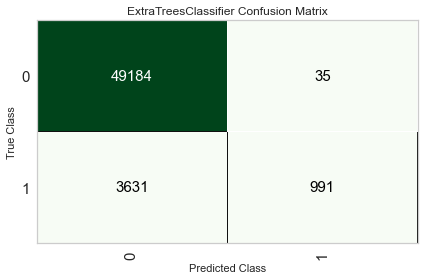

In [174]:
%matplotlib inline
plot_model(Tun_ET_Mod, plot = 'confusion_matrix')

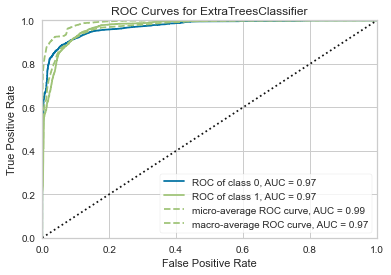

In [175]:
plot_model(Tun_ET_Mod, plot = 'auc')

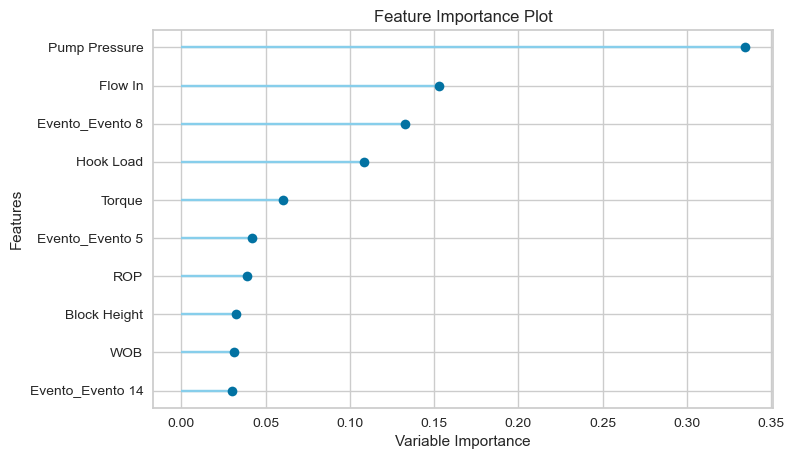

In [176]:
plot_model(Tun_ET_Mod, plot = 'feature')

In [177]:
predict_model(Tun_ET_Mod)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9319,0.9710,0.2144,0.9659,0.3509,0.3300,0.4379


,Block Height,Hook Load,WOB,Torque,Flow In,Pump Pressure,RPM,ROP,Evento_Evento 1,Evento_Evento 10,...,Evento_Evento 2,Evento_Evento 3,Evento_Evento 4,Evento_Evento 5,Evento_Evento 6,Evento_Evento 8,Evento_Evento 9,Pega,Label,Score
0,27.570490,452.045013,8.306351,9.433177,313.249939,1939.617310,555.392822,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9862
1,19.815973,357.270538,1.135157,8.755857,161.213394,2973.263672,157.293518,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9975
2,101.525635,298.214294,6.905323,0.582689,92.689278,77.098862,12.217590,2.745142,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8709
3,101.078850,213.411560,5.162118,0.546317,0.000000,0.000000,4.769943,1.301429,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9418
4,99.435181,473.109589,0.000000,6.678775,112.827026,1090.604370,0.323937,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.7996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53836,12.068230,332.221771,9.229812,0.487676,106.458755,400.577698,102.573616,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6898
53837,25.893316,431.420471,6.080356,16.027266,625.487061,3531.224609,176.792282,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9985
53838,59.230541,345.360443,0.768078,0.445521,492.890198,955.734558,83.839447,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.8305
53839,46.309692,253.979172,5.841493,4.955795,891.661194,2201.177979,122.768463,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9965
